First, we import the package needed.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from datetime import datetime #is to convert the date based data to be easier to procceed 

import warnings #import warning is to ignoring any warning to keep the esthetic.
warnings.simplefilter("ignore")

Now, importing the dataframe

In [16]:
df = pd.read_csv('./medallists.csv')

df

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,2024-08-11,Bronze Medal,3,BOWEN Alex,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1993-09-04,1908350
2267,2024-08-11,Bronze Medal,3,DODD Chase William,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,2003-04-05,1908354
2268,2024-08-11,Bronze Medal,3,DODD Ryder,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,2006-01-19,1908355
2269,2024-08-11,Bronze Medal,3,IRVING Max,Male,United States,USA,United States,United States of America,M,Water Polo,Men,HTEAM,/en/paris-2024/results/water-polo/men/fnl-0002...,1995-05-21,1908361


Now, listing the top 10 athletes with their neceessary data

In [17]:
top_athletes = df[['name', 'country', 'discipline']].value_counts().head(10)

top_athletes

name                country        discipline         
ZHANG Yufei         China          Swimming               6
MARCHAND Leon       France         Swimming               5
HUSKE Torri         United States  Swimming               5
McKEOWN Kaylee      Australia      Swimming               5
O'CALLAGHAN Mollie  Australia      Swimming               5
SMITH Regan         United States  Swimming               5
ANDRADE Rebeca      Brazil         Artistic Gymnastics    4
DOUGLASS Kate       United States  Swimming               4
LEDECKY Katie       United States  Swimming               4
BILES Simone        United States  Artistic Gymnastics    4
Name: count, dtype: int64

As we see, the swimming discipline is very dominant here.

Now, we want to get the age of athlete at the event. So, we calculate the age based on the birth date data. Also if they have the 'NaN' data we can remove it.

In [35]:
df['medal_date'] = pd.to_datetime(df['medal_date']) # transforming the date data to be calculated after
df['birth_date'] = pd.to_datetime(df['birth_date'])

df['age_at_event'] = df['medal_date'].dt.year - df['birth_date'].dt.year

print(df.shape)

df = df.dropna(subset=['age_at_event']) # we remove the unlikely data

print('\nto\n')
print(df.shape)

(2252, 18)

to

(2252, 18)


We, have 19 Nan data on the table. So, we remove them.

In [37]:
# define age group
bins = [0, 18, 25, 30, 35, 40, 50, 100]
labels = ['<18', '18-25', '26-30', '31-35', '36-40', '41-50', '50+']

df['age_group'] = pd.cut(df['age_at_event'], # 'cut' function is to make the classification.
                        bins=bins,
                        labels=labels,
                        right=False)

age_group_success = df['age_group'].value_counts().sort_index() # sort_index() is to sorting the output based on the index, not the value.
# medallists_df['age_group']
age_group_success

age_group
<18       20
18-25    729
26-30    892
31-35    458
36-40    120
41-50     28
50+        5
Name: count, dtype: int64

Now, we separate the medallists based-on their gender.

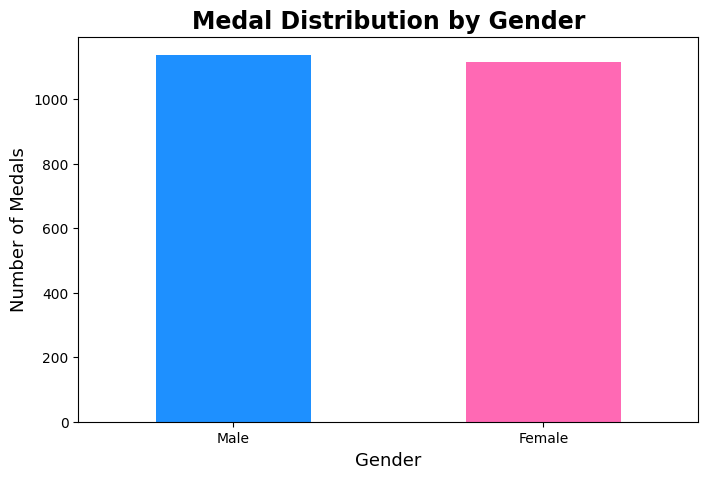

In [50]:
# medal distribution by gender
gender_success = df['gender'].value_counts()
gender_success.plot(kind='bar',
                    figsize=(8,5),
                    color=['dodgerblue', 'hotpink'])

plt.title('Medal Distribution by Gender', fontsize=17, weight='bold')
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Number of Medals', fontsize=13)
plt.xticks(rotation=0)
# plt.tight_layout()

plt.show()

Then, we showing the perentation of each medallists representing their country, based-on their gender.

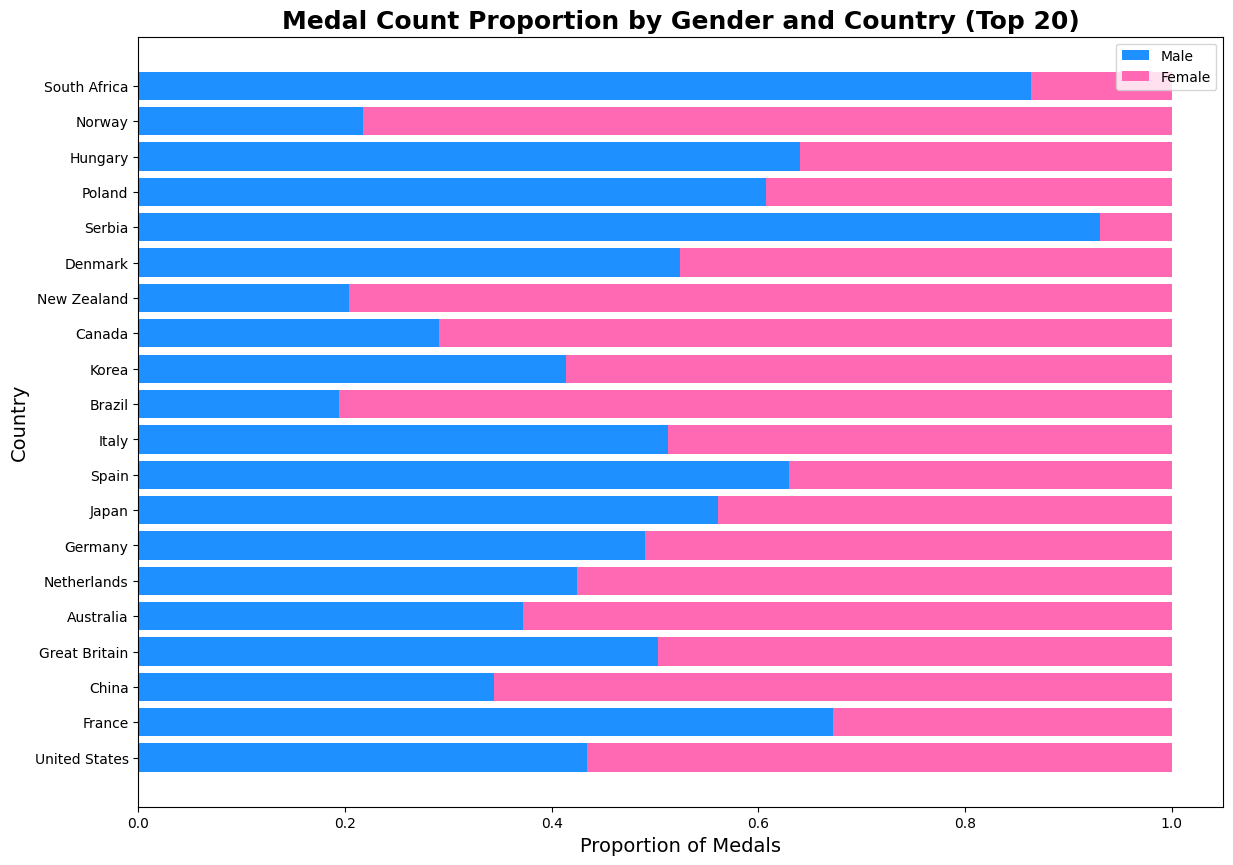

In [49]:
# this fillna() is to make the NaN data into 0.
# also the unstack() is to not showing the count result.

gender_medal_count = df.groupby(['country','gender'])['medal_type'].count().unstack().fillna(0) 

gender_medal_count['total'] = gender_medal_count.sum(axis=1) # axis=1 is to process based-on column
gender_medal_count['Male'] = gender_medal_count['Male']/gender_medal_count['total']
gender_medal_count['Female'] = gender_medal_count['Female']/gender_medal_count['total']

top_20_gender_balance = gender_medal_count.sort_values(by='total',ascending=False).head(20)

plt.figure(figsize=(14,10))
plt.barh(top_20_gender_balance.index,
         top_20_gender_balance['Male'],
         color='dodgerblue',
         label='Male')
plt.barh(top_20_gender_balance.index,
         top_20_gender_balance['Female'],
         left=top_20_gender_balance['Male'],
         color='hotpink',
         label='Female')

plt.xlabel('Proportion of Medals', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Medal Count Proportion by Gender and Country (Top 20)',
          fontsize=18,
          weight='bold')
plt.legend(loc='upper right')

plt.show()

Now, we analyzing the medallists based on their age.

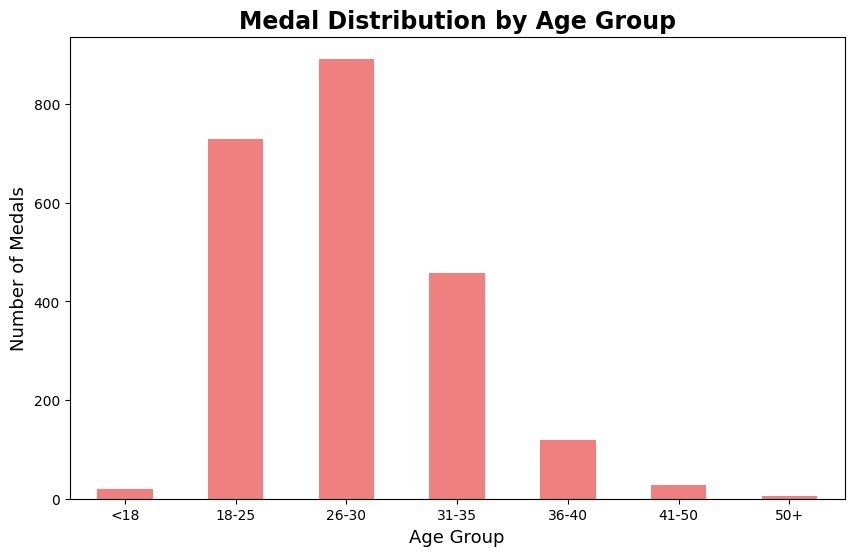

In [52]:
# medal distribution by age group
age_group_success.plot(kind='bar',
                       figsize=(10,6),
                       color='lightcoral')
plt.title('Medal Distribution by Age Group', weight='bold', fontsize=17)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Number of Medals', fontsize=13)
plt.xticks(rotation=0)

plt.show()

Now, we deliver the medal distribution based on the discipline and the age.

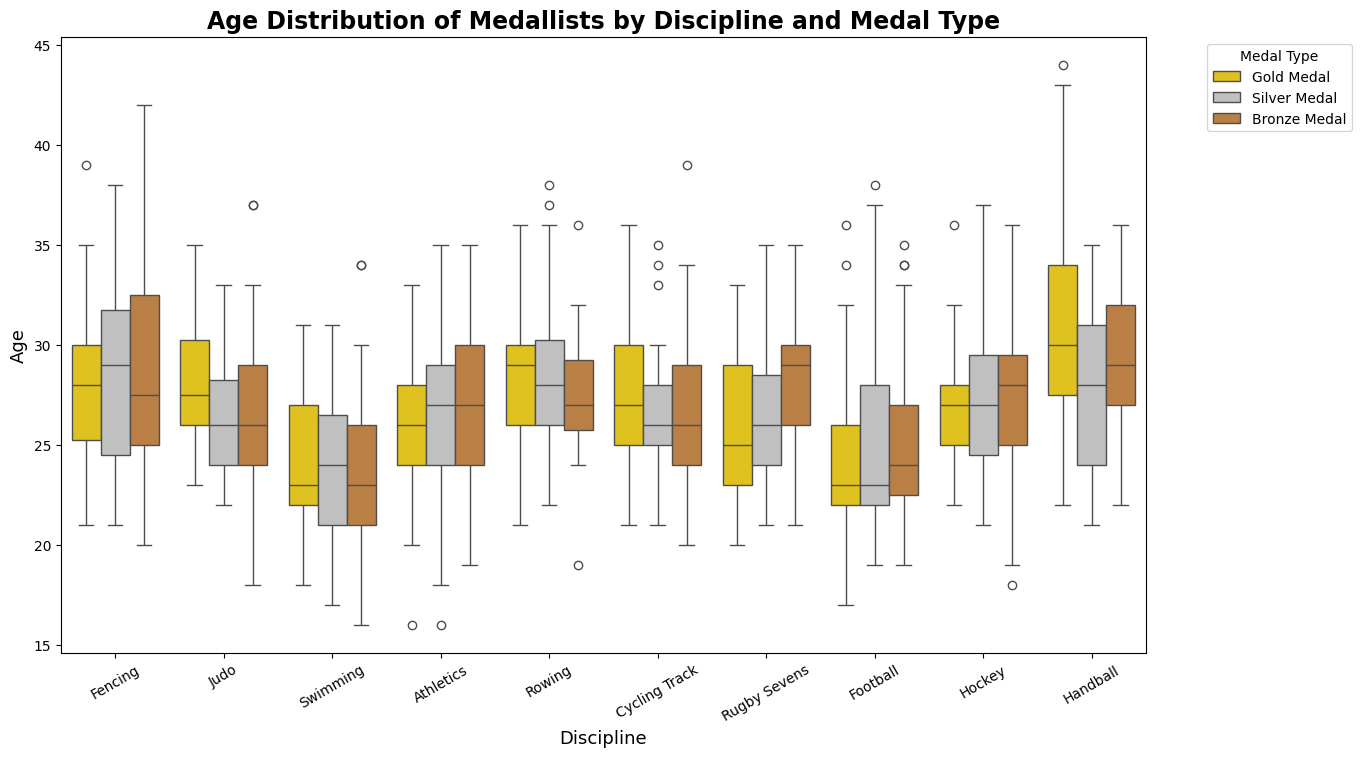

In [64]:
top_disciplines = df['discipline'].value_counts().head(10).index # index is return to the wanted criteria's index

filtered_data = df[df['discipline'].isin(top_disciplines)] # 'isin' is to filtering the column 'discipline' that contain one of the 'top_disciplines'

plt.figure(figsize=(14,8))
sns.boxplot(data=filtered_data,
            x='discipline',
            y='age_at_event',
            hue='medal_type', # 'hue' is the parameter, then the 'palette' is the color based on hue.
            palette=['#FFD700','#C0C0C0','#CD7F32'])
plt.title('Age Distribution of Medallists by Discipline and Medal Type', fontsize=17, weight='bold')
plt.xlabel('Discipline', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.xticks(rotation=30)
plt.legend(title='Medal Type',
           bbox_to_anchor=(1.05,1),
           loc='upper left')

plt.show()

We can see that every discipline  has its distribution character based on the age. 

Now, we pick the top 10 number of medal by discipline.

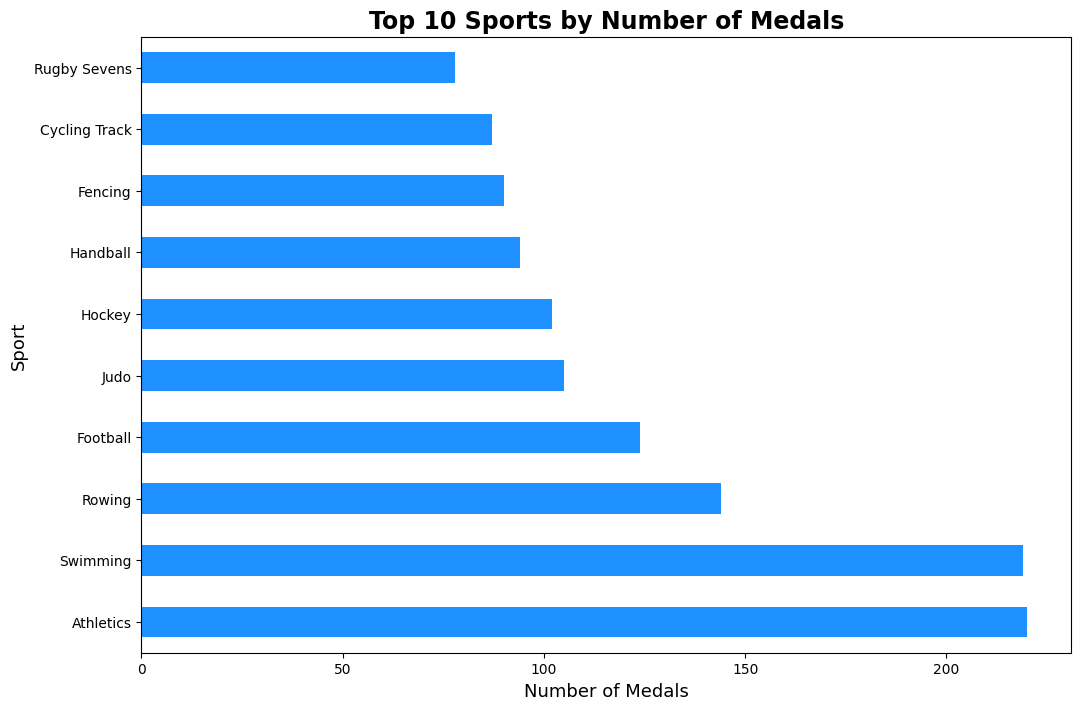

In [78]:
medals_by_sport = df.groupby('discipline')['medal_type'].count().sort_values(ascending=False)

# print(medals_by_sport)

plt.figure(figsize=(12,8))
medals_by_sport.head(10).plot(kind='barh', color='dodgerblue')
plt.title('Top 10 Sports by Number of Medals', fontsize=17, weight='bold')
plt.xlabel('Number of Medals', fontsize=13)
plt.ylabel('Sport', fontsize=13)

plt.show()

As we see, the athletics and swimming has very large number of medal compared to the others.

For the addition we plot it with Sankey Diagram Flow.

In [82]:
import plotly.graph_objects as go

medals_by_country_discipline = df.groupby(['country','discipline']).size().reset_index(name='medal_count')

top_10_countries = medals_by_country_discipline.groupby('country')['medal_count'].sum().sort_values(ascending=False).head(10).index
filtered_medals = medals_by_country_discipline[medals_by_country_discipline['country'].isin(top_10_countries)]

top_disciplines = filtered_medals.groupby('discipline')['medal_count'].sum().sort_values(ascending=False).head(10).index
filtered_medals = filtered_medals[filtered_medals['discipline'].isin(top_disciplines)]

countries = filtered_medals['country'].unique().tolist()
disciplines = filtered_medals['discipline'].unique().tolist()
nodes = countries + disciplines

source_indices= [nodes.index(country) for country in filtered_medals['country']]
target_indices = [nodes.index(discipline) for discipline in filtered_medals['discipline']]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black',width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=filtered_medals['medal_count']
    )
))

fig.update_layout(title_text='Sankey Diagram of Medal Flows by Country and Discipline (Top 10 Countries and Disciplines)', 
                  font_size=12)

fig.show()